In [1]:
# 1. graph(): this function is used to create a graph object which can be used to define the state, 
# edges and nodes of the graph. It takes a name as an argument which is used to identify the graph.

# 2. state: this function is used to define the state of the graph. It takes a name as an argument which is used to identify the state.
# It also takes a description as an argument which is used to describe the state.

# 3. edges: this function is used to define the edges of the graph. It takes a name as an argument which is used to identify the edge. 
# It also takes a description as an argument which is used to describe the edge. It also takes a source and target as arguments which are used to define the source and target of the edge.

# 4. nodes: this function is used to define the nodes of the graph. It takes a name as an argument which is used to identify the node. 
# It also takes a description as an argument which is used to describe the node. It also takes a state as an argument which is used to define the state of the node.

# 5. invoke: this function is used to invoke the tool. It takes a dictionary as an argument which contains the input parameters for the tool.

# 6. stategraph(): this function is used to create a state graph object which can be used to define the state, edges and nodes of the state graph. 
# It takes a name as an argument which is used to identify the state graph.

In [28]:
import dotenv
dotenv.load_dotenv()

True

In [29]:
from langchain_groq import ChatGroq
from langchain_core.messages import HumanMessage
from langgraph.graph import StateGraph, MessagesState, END
from IPython.display import Image, display

In [30]:
# Initialize the REAL Groq model (not OpenAI model name)
model = ChatGroq(
    model="llama-3.3-70b-versatile",  # Use actual Groq model
    #api_key="your-groq-api-key-here",  # Get from https://console.groq.com
    temperature=0.7
)

In [31]:
# Test it works
print(model.invoke("hi").content)

It's nice to meet you. Is there something I can help you with or would you like to chat?


Method 1: Without Using TypDict (Just for Understanding)

In [32]:
# Define LLM function for MessagesState
def llm(input):
    from langchain_google_genai import ChatGoogleGenerativeAI
    model=ChatGoogleGenerativeAI(model='gemini-1.5-flash')
    output=model.invoke(input)
    return output.content

In [33]:
# Define token counter for MessagesState
def token_counter(input):
    token=input.split()
    token_number=len(token)
    return f"total token number in the generated answer is {token_number}"

In [34]:
# Create state graph for MessagesState
workflow2 = StateGraph(MessagesState)

In [35]:
# Add nodes to the graph
workflow2.add_node("My_LLM",llm)
workflow2.add_node("LLM_Output_Token_Counter",token_counter)

In [36]:
# Add edge from LLM to token counter
workflow2.add_edge("My_LLM","LLM_Output_Token_Counter")

In [37]:
# Set entry point for the graph
workflow2.set_entry_point("My_LLM")

In [38]:
# Set finish point for the graph
workflow2.set_finish_point("LLM_Output_Token_Counter")

In [39]:
# Compile the graph into an executable application
app=workflow2.compile()

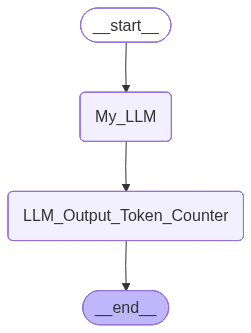

In [40]:
# Visualize the graph
display(Image(app.get_graph().draw_mermaid_png()))

In [52]:
# 7. Run it
result = app.invoke({
    "messages": [HumanMessage(content="What's the capital of India?")]
})

# 8. Print result
print("\n=== Answer ===")
print(result["messages"][-1].content)

Total token number in the generated answer is 7

=== Answer ===
The capital of India is New Delhi.


Method 2: Using TypDict

In [42]:
# Define LLM function for MessagesState
def llm(state: MessagesState):
    """Process messages with the LLM"""
    # Get messages from state and invoke model
    response = model.invoke(state["messages"])
    # Return new message to add to conversation
    return {"messages": [response]}

In [43]:
# Define token counter for MessagesState
def token_counter(state: MessagesState):
    """Count tokens in the last message"""
    # Get the last message (LLM's response)
    last_message = state["messages"][-1]
    
    # Simple token counting (split by whitespace)
    tokens = last_message.content.split()
    token_number = len(tokens)
    
    print(f"Total token number in the generated answer is {token_number}")
    
    # Return empty dict (don't modify messages)
    return {}


In [44]:
# Build the workflow
workflow2 = StateGraph(MessagesState)


In [45]:
# Add nodes - use the functions directly, not strings
workflow2.add_node("My_LLM", llm)
workflow2.add_node("LLM_Output_Token_Counter", token_counter)


In [46]:
# Add edge between nodes
workflow2.add_edge("My_LLM", "LLM_Output_Token_Counter")


In [47]:
# Set entry and finish points
workflow2.set_entry_point("My_LLM")
workflow2.set_finish_point("LLM_Output_Token_Counter")

In [48]:
# Compile the graph
app = workflow2.compile()

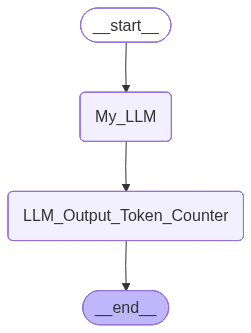

In [49]:
# Display the graph
display(Image(app.get_graph().draw_mermaid_png()))


In [50]:
# ✅ Run with proper MessagesState format
result = app.invoke({
    "messages": [HumanMessage(content="What's the capital of India?")]
})

Total token number in the generated answer is 7


In [51]:
# Print the conversation
print("\n=== Full Conversation ===")
for msg in result["messages"]:
    print(f"\n{msg.type.upper()}: {msg.content}")


=== Full Conversation ===

HUMAN: What's the capital of India?

AI: The capital of India is New Delhi.
